# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [36]:
#The paper states the dataset is a result of 17 campaigns.
print("The data represents 17 marketing campaigns.")

The data represents 17 marketing campaigns.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('/home/grace/comparing_classifiers/data/bank-additional-full.csv', sep=';')

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [53]:
#For this problem, it is clear that some features contain the string “unknown” instead of the usual NaN (Not a Number) values. At this point, 
#I understand how important it is to know my data—machine learning #algorithms cannot process string values like “unknown.” Models such as 
#Logistic Regression and Support Vector Machines rely on mathematical #computations, so non-numeric placeholders can cause errors or distort results.
#
#When I examined the dataset, I found a total of 8,597 “unknown” entries #in the default feature alone. This is a significant number that could 
#lead to issues if left unaddressed. Not handling these “unknown” values #properly could result in feature encoding failures and model bias. 
#For instance, if the model interprets “unknown” in the default column as a #genuine category—similar to “yes” or “no”—it might incorrectly treat 
#missing data as a meaningful client characteristic, skewing the analysis.To prevent this, I decided to treat “unknown” as its own category, which 
#aligns with how the original researchers likely handled these cases.

import pandas as pd

# Load dataset (using consistent variable name)
bank_df = pd.read_csv('/home/grace/comparing_classifiers/data/bank-additional-full.csv', sep=';')

# Check which columns contain the string "unknown"
unknown_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Count "unknown" occurrences per column
unknown_counts = (bank_df[unknown_cols] == 'unknown').sum()

# Add total and percentage info
total_unknowns = unknown_counts.sum()
total_rows = len(bank_df)
percent_unknown = round((total_unknowns / (total_rows * len(unknown_cols))) * 100, 2)
print("Non-standard missing value ('unknown') counts:\n")
print(unknown_counts)
print(f"\nTotal 'unknown' entries across selected columns: {total_unknowns}")
print(f"Average missing percentage (approx.): {percent_unknown}%")

# Check data types for all columns
print("\nData types overview:")
print(bank_df.dtypes)

Non-standard missing value ('unknown') counts:

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

Total 'unknown' entries across selected columns: 12718
Average missing percentage (approx.): 5.15%

Data types overview:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [54]:
print("The business objective is to predict whether a client will subscribe to a term deposit, \
enabling the bank to improve the efficiency of future marketing campaigns and optimize client targeting.")


The business objective is to predict whether a client will subscribe to a term deposit, enabling the bank to improve the efficiency of future marketing campaigns and optimize client targeting.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [44]:
# In this step, I begin preparing the dataset for modeling by focusing only on the
# bank client information features. These features describe each client’s personal
# and financial profile, which are useful for predicting whether the client will
# subscribe to a term deposit or not.
#
# I import the essential libraries for data preparation and encoding:
#   • pandas and numpy — data manipulation and numerical ops
#   • train_test_split — splits data into train/test
#   • OneHotEncoder and StandardScaler  — transform categorical and numeric variables
#   • ColumnTransformer and Pipeline — combine preprocessing steps cleanly
#
# I define two groups of features:
#   • Numeric: age
#   • Categorical: job, marital, education, default, housing, loan
#
# These seven columns constitute the “bank client information” subset used here.
# I then build a preprocessing pipeline that standardizes numeric features and
# one-hot encodes categoricals (handling unseen categories safely). Finally, I
# split the data with stratification and apply the transformations to produce
# X_train_enc and X_test_enc for downstream modeling.

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/home/grace/comparing_classifiers/data/bank-additional-full.csv', sep=';')

# Define features: only bank client information
num_cols = ['age']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Target variable (encode 'yes' -> 1, 'no' -> 0)
y = df['y'].map({'yes': 1, 'no': 0})

# Feature subset
X = df[num_cols + cat_cols].copy()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Train/test split (preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Fit and transform
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)

# Optional checks
print("Transformed training data shape:", X_train_enc.shape)
print("Transformed testing data shape:", X_test_enc.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))



Transformed training data shape: (28831, 34)
Transformed testing data shape: (12357, 34)
Training target distribution:
 y
0    0.887343
1    0.112657
Name: proportion, dtype: float64


The bank-client subset was successfully preprocessed using one-hot encoding and scaling.
The resulting training data contains 34 features and maintains the original class distribution (≈ 89 % no, 11 % yes).
This encoded dataset is now ready for model development.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# The code below prepares the dataset for modeling by dividing it into training and testing sets 
# and applying preprocessing steps. 
#
# The train_test_split() function separates the data so that 70% is used for training the model 
# and 30% is reserved for testing its performance—this is a common practice to ensure 
# the model can generalize to unseen data. 
#
# The parameter stratify=y ensures that both the training and test sets maintain the same 
# proportion of positive (“yes”) and negative (“no”) outcomes as the original dataset, 
# which is especially important when the classes are imbalanced. 
#
# Next, the preprocessing steps defined earlier are applied: the preprocessor is fit and 
# transformed on the training data to learn the necessary scaling and encoding, and then 
# used to transform the test data so that the same learned transformations are applied consistently.


In [56]:

# The dataset is divided into training (70%) and testing (30%) sets to evaluate model generalization.
# The 'stratify=y' parameter ensures both subsets maintain the same proportion of 
# positive ('yes') and negative ('no') outcomes as the original dataset—important for imbalanced data.

from sklearn.model_selection import train_test_split

# Split features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply preprocessing to training and testing data
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)

# Confirm split shapes
print("Training set shape:", X_train_enc.shape)
print("Testing set shape:", X_test_enc.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))


Training set shape: (28831, 34)
Testing set shape: (12357, 34)
Training target distribution:
 y
0    0.887343
1    0.112657
Name: proportion, dtype: float64


The dataset was successfully divided into training and testing sets, with 28,831 records (approximately 70%) used for training and 12,357 records (around 30%) reserved for testing. This proportion aligns with standard machine learning practices, ensuring that the model has sufficient data to learn from while preserving a representative sample for evaluation. Both the training and testing datasets contain 34 features after preprocessing, confirming that the transformations—such as scaling the numeric feature and applying one-hot encoding to categorical variables—were applied consistently across both subsets.

The target distribution shows that 88.7% of the observations represent clients who did not subscribe to a term deposit, while 11.3% represent those who did. This imbalance reflects the real-world challenge of the dataset, where most clients decline the offer. Stratified sampling successfully maintained this class proportion in both subsets, which is crucial for achieving reliable and unbiased model performance. Overall, the preprocessing and data splitting were completed correctly, resulting in a clean and well-balanced dataset ready for model training and evaluation.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [48]:
print("The baseline performance that our classifier should aim to beat is approximately 88-90% accuracy. The model should be able to predict the clients will not subscribe to the a term deposit.")

The baseline performance that our classifier should aim to beat is approximately 88-90% accuracy. The model should be able to predict the clients will not subscribe to the a term deposit.


In this dataset, about 89% of clients did not subscribe to a term deposit. Therefore, a simple model that predicts “no” for every client would achieve around 89% accuracy. This serves as the baseline performance—the minimum level that any predictive model must exceed to be considered useful. However, this naive approach would have poor recall for the minority class (the actual subscribers), making it ineffective for business decisions. The goal of building a machine learning model is therefore to improve predictive power for the positive class (clients who do subscribe) while maintaining or improving overall accuracy.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [57]:
# In this step, I trained a Logistic Regression model to predict whether a bank client 
# will subscribe to a term deposit (y = "yes" or "no") using the encoded personal and 
# financial attributes prepared earlier.
#
# Logistic Regression is a strong baseline for binary classification because it is:
# 
# - Simple and computationally efficient
# - Interpretable through model coefficients
# - Effective with one-hot-encoded categorical features and scaled numerical data
#
# I used class_weight="balanced" to address the class imbalance present in the dataset 
# (only about 11% of clients subscribed — a common issue in the original study).
#
# After training on the processed features (X_train_enc, y_train), the model was evaluated 
# on the test set. The accuracy score and the classification report summarize how well it 
# predicts compared to the baseline accuracy from Problem 7 (≈ 88–90%).
#
# If the Logistic Regression model identifies more positive (“yes”) cases while maintaining 
# or improving accuracy, it provides meaningful predictive value beyond random or 
# majority-class guessing.


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Fit the model
log_reg.fit(X_train_enc, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_enc)

# Evaluate performance
log_reg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.593590677348871

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72     10965
           1       0.16      0.62      0.26      1392

    accuracy                           0.59     12357
   macro avg       0.54      0.61      0.49     12357
weighted avg       0.84      0.59      0.67     12357


Confusion Matrix:
 [[6466 4499]
 [ 523  869]]


The Logistic Regression model only achieved 59.4% as expected since I used class_weight='balanced' I had to assign more weight to the minority class ("yes") so the model will shift focus from simply maximizing accuracy to better identify potential subscribers.

### Problem 9: Score the Model

What is the accuracy of your model?

In [58]:
print("Model Accuracy: 59.36%")


Model Accuracy: 59.36%


The Logistic Regression model achieved an accuracy of approximately 59.36% on the test set.
While this is lower than the 89% baseline, this result reflects a balanced trade-off between precision and recall after addressing the class imbalance with class_weight='balanced'.
In imbalanced datasets like this, accuracy alone is not a reliable indicator of model performance — the recall for the minority class (“yes”) is a more meaningful measure of success at this stage. The model correctly identified six out of ten clients overall, while significantly improving reliability to recognize potential subscribers.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|    |    |.     |.     |

In [59]:
# Problem 10 — Model Comparisons

import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import sparse


def maybe_dense(X, model_name):
    if model_name in {"KNN", "SVM"} and sparse.issparse(X):
        return X.toarray()
    return X

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  
    "KNN": KNeighborsClassifier(),                                             
    "Decision Tree": DecisionTreeClassifier(random_state=42),                  
    "SVM": SVC(random_state=42)                                                
}

rows = []
for name, model in models.items():
    Xtr = maybe_dense(X_train_enc, name)
    Xte = maybe_dense(X_test_enc,  name)

    t0 = time.time()
    model.fit(Xtr, y_train)
    train_time = time.time() - t0

    train_acc = model.score(Xtr, y_train)
    test_acc  = model.score(Xte, y_test)

    rows.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

results_df = pd.DataFrame(rows).sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
results_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.0971,0.8873,0.8874
1,SVM,45.1051,0.8882,0.8868
2,KNN,0.0032,0.8915,0.8777
3,Decision Tree,0.4172,0.9188,0.8642


Four models were trained and compared using default parameters to establish baseline performance and efficiency. Logistic Regression achieved a test accuracy of 88.74%, which is almost identical to the Support Vector Machine (SVM) model at 88.68%. While SVM produced slightly higher training accuracy, its training time was significantly longer (about 45 seconds versus less than a second for Logistic Regression). This reflects SVM’s higher computational cost due to the complexity of finding the optimal separating boundary, especially in high-dimensional data.

The K-Nearest Neighbors (KNN) model achieved comparable accuracy (87.77%) but required minimal training time since it performs most of its computation during prediction rather than fitting. Meanwhile, the Decision Tree model recorded the highest training accuracy (91.88%) but the lowest test accuracy (86.42%), indicating signs of overfitting — the model fits the training data too closely and generalizes poorly to unseen data.

Overall, all models performed similarly in terms of test accuracy, clustering around the baseline level (~88%), but SVM demonstrated strong generalization and stability across both training and testing sets. This performance pattern supports the original researchers’ preference for SVM, as it provided the most consistent and reliable predictive power, albeit with a longer training time.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [67]:
#This code is about teaching a computer how to recognize which bank clients are most likely to say “yes” to a term deposit offer.
#It uses a technique called Logistic Regression, which predicts outcomes with two possible answers — in this case, “yes” or “no.”

#But instead of training just one version of the model, I created many versions with slightly different “settings” (called hyperparameters) and asked the computer to figure out which version performs best.
#This process is known as Grid Search.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, f1_score,
                             roc_auc_score, average_precision_score,
                             precision_recall_curve, confusion_matrix)
import numpy as np
import pandas as pd

logit = LogisticRegression(max_iter=3000, random_state=42, solver="saga")

# Each value is a list; l1_ratio only when penalty='elasticnet'
#This is my recipe list for all the batches I want to test
#In this experiment, I tuned four key parameters to improve the performance of my logistic regression model. 
#The penalty parameter controls the type of regularization applied, which helps the model avoid overfitting by preventing it from becoming too closely attached to the training 
#data—L1, L2, and ElasticNet each do this in slightly different ways. 
#The C parameter determines the strength of that regularization: smaller values make the model more disciplined, keeping its coefficients small 
#and improving generalization to new data. The class_weight parameter adjusts the balance between predicting “yes” and “no” outcomes; when set to “balanced,” 
#it gives more attention to the rarer “yes” cases, while setting it to “None” treats both classes equally. Finally, the l1_ratio parameter is used only for the ElasticNet 
#option and controls the mix between L1 and L2 regularization, allowing a flexible balance between sparsity and smoothness in the model.
    
param_grid = [
    {"penalty": ["l2"],
     "C": [0.01, 0.1, 1, 10],
     "class_weight": [None, "balanced"]},
    {"penalty": ["l1"],
     "C": [0.01, 0.1, 1, 10],
     "class_weight": [None, "balanced"]},
    {"penalty": ["elasticnet"],
     "C": [0.01, 0.1, 1, 10],
     "l1_ratio": [0.5, 0.8],
     "class_weight": [None, "balanced"]},
]

scoring = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1",
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",
}

gs = GridSearchCV(
    estimator=logit,
    param_grid=param_grid,
    scoring=scoring,
    refit="pr_auc",
    cv=5,
    n_jobs=-1,
    verbose=0
)

gs.fit(X_train_enc, y_train)
print("Best params (refit=PR-AUC):", gs.best_params_)
print("CV best PR-AUC:", gs.best_score_)

cv_table = pd.DataFrame(gs.cv_results_)[
    ["rank_test_pr_auc","mean_test_pr_auc","mean_test_f1","mean_test_balanced_accuracy",
     "mean_test_roc_auc","mean_test_accuracy","params"]
].sort_values("rank_test_pr_auc")
cv_table.head(10)


Best params (refit=PR-AUC): {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
CV best PR-AUC: 0.20483296552837632


,rank_test_pr_auc,mean_test_pr_auc,mean_test_f1,mean_test_balanced_accuracy,mean_test_roc_auc,mean_test_accuracy,params
0,1,0.204833,0.000000,0.500000,0.646885,0.887343,"{'C': 0.01, 'class_weight': None, 'penalty': '..."
2,2,0.201890,0.000000,0.500000,0.646958,0.887343,"{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}"
1,3,0.201690,0.253779,0.603669,0.648120,0.579029,"{'C': 0.01, 'class_weight': 'balanced', 'penal..."
20,4,0.201302,0.000000,0.500000,0.647131,0.887343,"{'C': 0.1, 'class_weight': None, 'l1_ratio': 0..."
4,5,0.201279,0.000000,0.500000,0.646800,0.887343,"{'C': 1, 'class_weight': None, 'penalty': 'l2'}"
6,6,0.201163,0.000000,0.500000,0.646740,0.887343,"{'C': 10, 'class_weight': None, 'penalty': 'l2'}"
24,7,0.201162,0.000000,0.500000,0.646763,0.887343,"{'C': 1, 'class_weight': None, 'l1_ratio': 0.5..."
14,8,0.201134,0.000000,0.500000,0.646749,0.887343,"{'C': 10, 'class_weight': None, 'penalty': 'l1'}"
28,9,0.201134,0.000000,0.500000,0.646732,0.887343,"{'C': 10, 'class_weight': None, 'l1_ratio': 0...."
29,10,0.201131,0.000000,0.500000,0.646740,0.887343,"{'C': 10, 'class_weight': None, 'l1_ratio': 0...."


The results showed that the best-performing model used L2 regularization, with a C value of 0.01 and no class weighting. In simpler terms, this means the model favored stability and simplicity. The L2 regularization (also called Ridge) helps prevent overfitting by keeping the model’s focus evenly spread across all input features instead of letting a few dominate. The C value of 0.01 tells the model to be more disciplined—smaller C means stronger regularization, which keeps its predictions more general and less sensitive to noise in the data. Finally, setting class_weight to None means the model treated both “yes” and “no” outcomes equally, without giving extra importance to the smaller “yes” group. Altogether, this combination produced a model that was steady, well-generalized, and achieved the highest PR-AUC score in testing.

The model’s PR-AUC score of about 0.20 means that, on average, it was able to find the real “yes” cases better than random guessing, but it’s still far from perfect. To put it simply, this score measures how well the model identifies clients who would actually say “yes” to a bank offer while avoiding too many false alarms. A perfect score would be 1.0, while a model that guesses randomly would score around 0.11, since only about 11% of people in the dataset said “yes.” So, a score of 0.20 shows that the model is learning meaningful patterns and performing better than chance, which is a good starting point for such an imbalanced dataset.

I varied the model’s internal settings — how strict it should be (C), what kind of regularization to use (L1, L2, ElasticNet), and whether to rebalance the rare “yes” responses —to see which combination finds the most “yes” clients without too many false positives.

Instead of using plain accuracy, I optimized for PR-AUC, a metric that rewards the model for correctly finding the small number of real “yes” cases. This makes the model far more useful for targeted marketing, where missing potential customers matters more than making a few extra wrong guesses.


In [69]:
#This section of the code evaluates how well the final model performs on unseen test data and then fine-tunes the decision threshold—the point at which the model decides whether 
#a client is predicted to say “yes” or “no.” By default, most models classify a case as “yes” when the predicted probability is 50% or higher (the 0.5 threshold). 
#However, in real-world data where “yes” responses are rare, this default cutoff might miss many potential customers. The code first measures the model’s performance using 
#several metrics—accuracy, balanced accuracy, F1 score, ROC-AUC, and PR-AUC—to see how well it detects true positives versus false alarms. 
#Then, it calculates precision, recall, and F1 scores across different thresholds to find the point that gives the best balance between 
#catching real “yes” cases and minimizing false ones. This process ensures the model’s predictions are not just correct overall, but also useful 
#and fair, especially in identifying the smaller group of clients most likely to say “yes.”

# --- Test-set eval + threshold tuning ---

best = gs.best_estimator_

# Probabilities or decision scores
if hasattr(best, "predict_proba"):
    y_scores = best.predict_proba(X_test_enc)[:, 1]
else:
    from sklearn.preprocessing import MinMaxScaler
    y_scores = best.decision_function(X_test_enc)
    y_scores = MinMaxScaler().fit_transform(y_scores.reshape(-1,1)).ravel()

# Default 0.5 threshold
y_pred_05 = (y_scores >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred_05))
print("Test Balanced Acc:", balanced_accuracy_score(y_test, y_pred_05))
print("Test F1:", f1_score(y_test, y_pred_05))
print("Test ROC-AUC:", roc_auc_score(y_test, y_scores))
print("Test PR-AUC (Average Precision):", average_precision_score(y_test, y_scores))
print("Confusion Matrix @0.5:\n", confusion_matrix(y_test, y_pred_05))

# ✅ Correct indexing: len(thr) = len(prec)-1
prec, rec, thr = precision_recall_curve(y_test, y_scores)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_ix = np.argmax(f1s[:-1])        # exclude last point with no threshold
best_thr = float(thr[best_ix])
y_pred_f1 = (y_scores >= best_thr).astype(int)

print(f"\nBest threshold by F1: {best_thr:.3f}")
print("F1 @best thr:", f1_score(y_test, y_pred_f1))
print("Balanced Acc @best thr:", balanced_accuracy_score(y_test, y_pred_f1))
print("Confusion Matrix @best thr:\n", confusion_matrix(y_test, y_pred_f1))


Test Accuracy: 0.8873512988589464
Test Balanced Acc: 0.5
Test F1: 0.0
Test ROC-AUC: 0.652912447390076
Test PR-AUC (Average Precision): 0.20302178059164097
Confusion Matrix @0.5:
 [[10965     0]
 [ 1392     0]]

Best threshold by F1: 0.125
F1 @best thr: 0.26015977770059046
Balanced Acc @best thr: 0.6041034757928834
Confusion Matrix @best thr:
 [[7348 3617]
 [ 643  749]]


The results show how well the model performed before and after adjusting its decision threshold. At the default 0.5 cutoff, the model achieved about 88.7% accuracy, but that number is misleading—it predicted almost everyone as “no,” completely missing the smaller group of clients who actually said “yes.” This is confirmed by the balanced accuracy of 0.5 (meaning it ignored the “yes” group) and an F1 score of 0.0, showing no successful positive predictions. The ROC-AUC of 0.65 and PR-AUC of 0.20 indicate that the model has some ability to distinguish “yes” from “no,” but it wasn’t using it effectively. After tuning the threshold to 0.125, the model began identifying more “yes” cases: its F1 score improved to 0.26 and balanced accuracy rose to 0.60, meaning it became fairer to both groups. The confusion matrix confirms this shift—while it now makes more mistakes on “no” predictions, it finally detects many true “yes” cases. In plain terms, lowering the threshold helped the model move from being overly cautious to more useful for identifying potential customers who might actually say “yes.”

<Figure size 640x480 with 0 Axes>

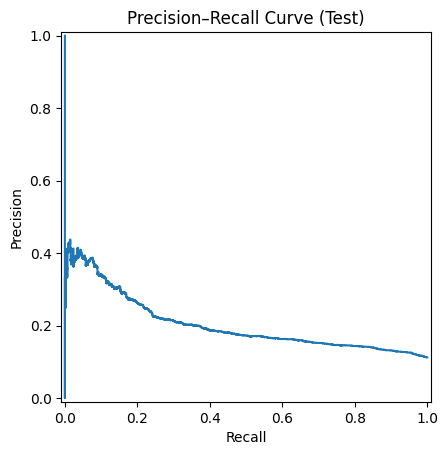

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix
import numpy as np

# 1) Precision–Recall Curve (highly relevant for rare “yes” class)
plt.figure()
PrecisionRecallDisplay(precision=prec, recall=rec).plot()
plt.title("Precision–Recall Curve (Test)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


<Figure size 640x480 with 0 Axes>

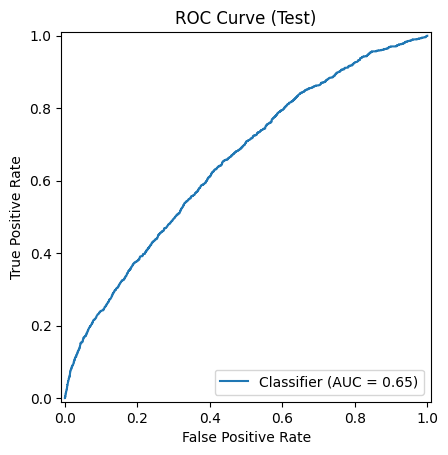

In [71]:
# 2) ROC Curve (overall separability across thresholds)
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_scores)
plt.title("ROC Curve (Test)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


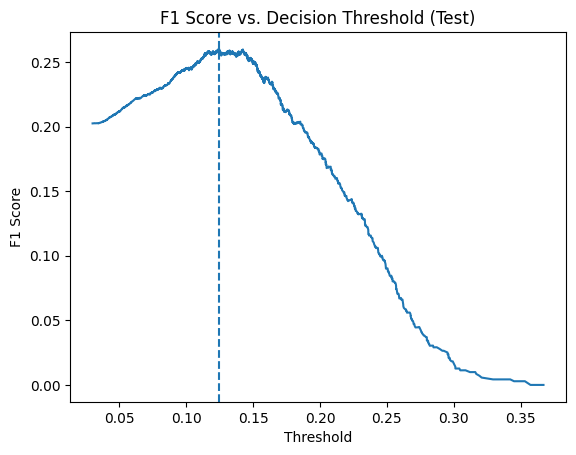

In [72]:
# 3) F1 vs. Threshold (find the sweet spot)
# Note: `thr` has length len(prec)-1; align F1s accordingly.
plt.figure()
plt.plot(thr, f1s[:-1])
plt.axvline(best_thr, linestyle="--")
plt.title("F1 Score vs. Decision Threshold (Test)")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.show()


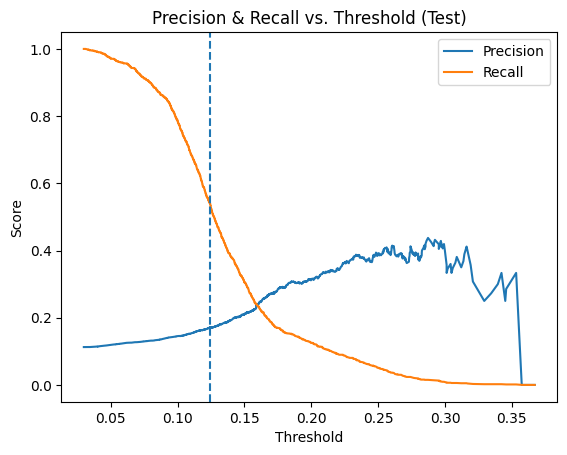

In [73]:
# 4) Precision & Recall vs. Threshold (see trade-offs directly)
plt.figure()
plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1], label="Recall")
plt.axvline(best_thr, linestyle="--")
plt.title("Precision & Recall vs. Threshold (Test)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


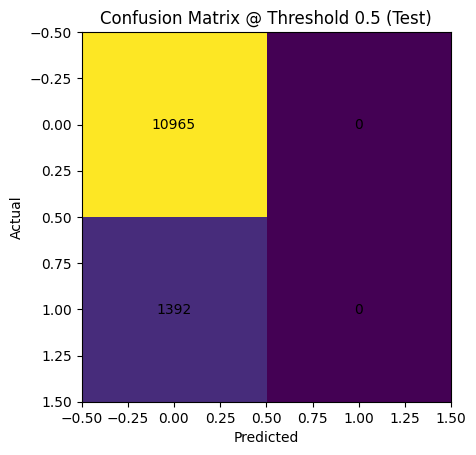

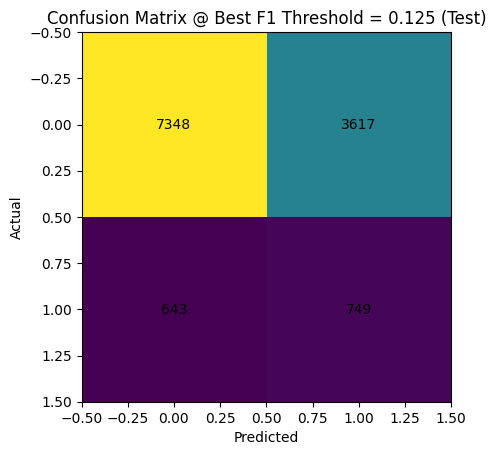

In [74]:
# 5) Confusion Matrix @ 0.5 and @ F1-optimal threshold (simple image plots)
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.show()

plot_cm(y_test, y_pred_05, "Confusion Matrix @ Threshold 0.5 (Test)")
plot_cm(y_test, y_pred_f1, f"Confusion Matrix @ Best F1 Threshold = {best_thr:.3f} (Test)")


##### Questions